# Predicting heart disease using machine learning
This will built a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

# 1.Problem Definition

In the statement they have given clinical parameters about a patient,can we predict whether or not they have heart disease?

# 2.Data
The original data come from the clevland data from the UCI machine learning Repository.

# 3.Evaluation

> If we can 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project.

# 4.Features
1.age
2.sex
3.chest pain type (4 values)
4.resting blood pressure
5.serum cholestoral in mg/dl
6.fasting blood sugar > 120 mg/dl
7.resting electrocardiographic results (values 0,1,2)
8.maximum heart rate achieved
9.exercise induced angina
10.oldpeak = ST depression induced by exercise relative to rest
11.the slope of the peak exercise ST segment
12.number of major vessels (0-3) colored by flourosopy
13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

# Preparing tools

we are going to use pandas,Matplotlib and Numpy for data analysis and manipulation.

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# models from Scikit-learn
from sklearn.linear_model  import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Load data

In [7]:
df=pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
df.shape

(303, 14)

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

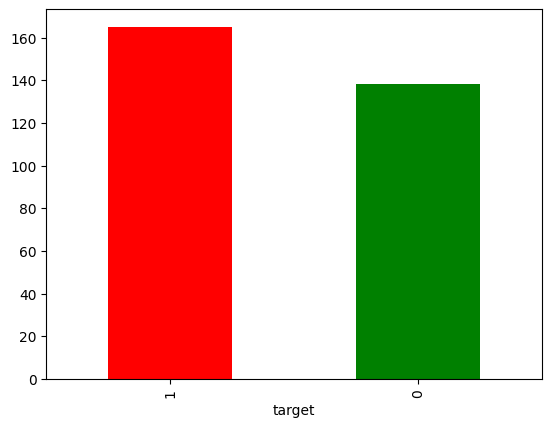

In [12]:
df["target"].value_counts().plot(kind="bar" , color=["red","green"]);

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Heart Disease Frequently according to Sex

In [15]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [16]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


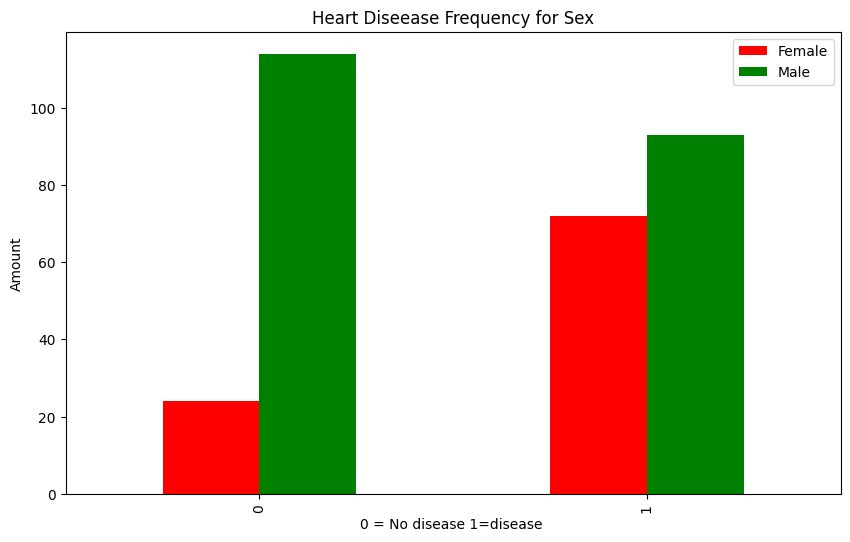

In [17]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["red","Green"])
plt.title("Heart Diseease Frequency for Sex")
plt.xlabel("0 = No disease 1=disease ")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);

# Age vs. Max Heart Rate for Heart Disease

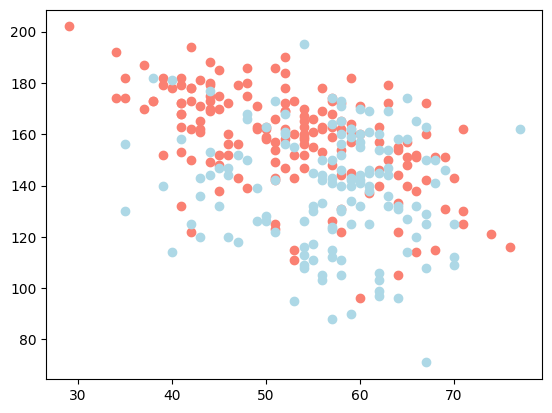

In [18]:
# Scatter with positive examples

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

# Scatter with negative examples

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

# Heart Disease Frequency per Chest Pain Type
# 3.cp-chest pain type
 0:Typical angina:chest pain related decrease blood     supply to the heart
 1:Atypical angina:chest pain not related to heart
 2:Non-anginnal plain:typically esophageal spasms(non heart related)
 3:Asymptomatic:Chest pain not showing signs of disease

In [19]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


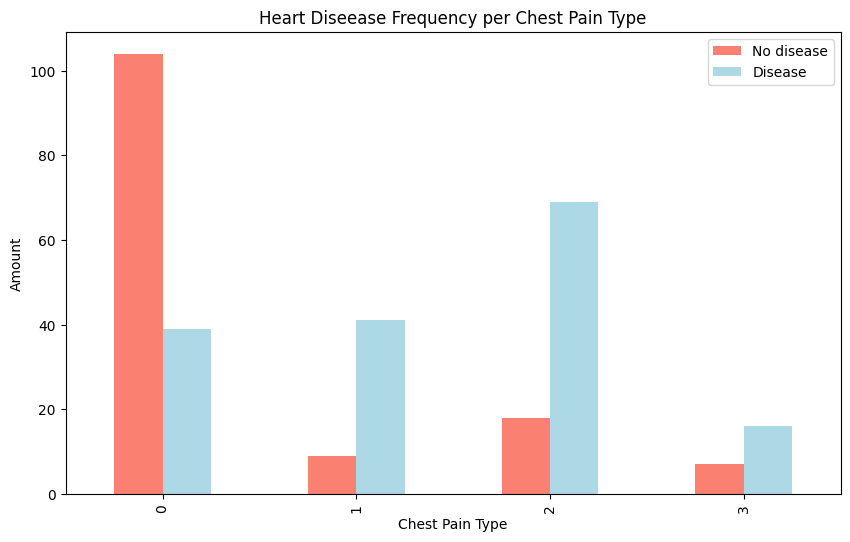

In [20]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon","lightblue"])
plt.title("Heart Diseease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"]);


In [21]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


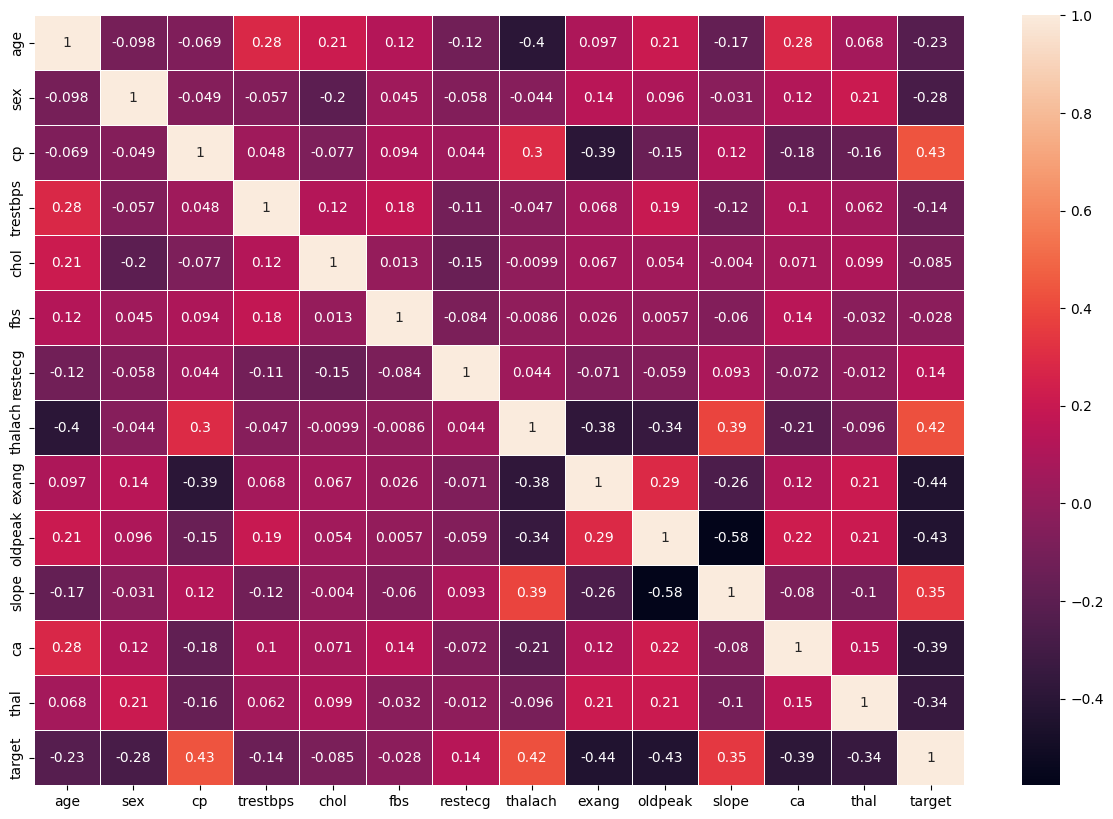

In [22]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5);

# 5.Modelling

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
#Split data into X and Y
X = df.drop("target",axis=1)

Y=df["target"]

In [25]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [26]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [27]:
np.random.seed(42)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [29]:
Y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now we have got the data now we build the machine learning model

we are going to try 
1.Logistic regression
2.K-Nearest Neighbour Classifier
3.Random Forest Classifier

In [30]:
models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}


#Create a function to fit and score models

def fit_and_score(models,X_train,X_test,Y_train,Y_test):
   #set a random seed
    np.random.seed(42)
   #Make a dictionary to keep a model scores
    model_scores={}
   #Loop through model
    for name,model in models.items():
       #Fit the model to the data
       model.fit(X_train,Y_train)
       #Evaluate the model and append its score to model_scores
       model_scores[name] = model.score(X_test,Y_test)
    return model_scores

In [31]:
model_scores=fit_and_score(models=models,
                         X_train=X_train,
                         X_test=X_test,
                          Y_train=Y_train,
                          Y_test=Y_test)
model_scores

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

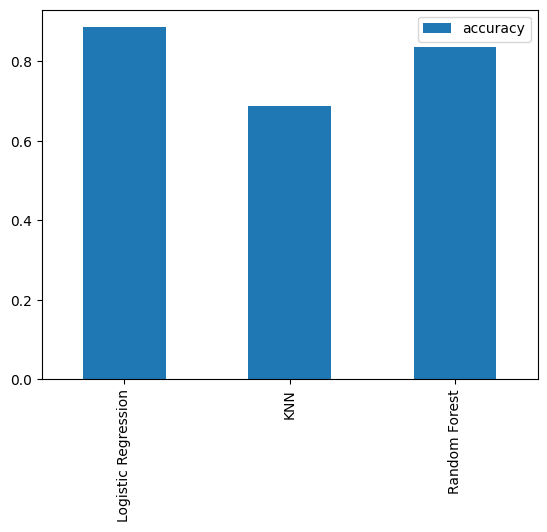

In [32]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

# Hyperparameter tuning

In [33]:
#lets tune KNN
train_scores=[]
test_scores=[]

# Create a list of different values for a neighbours
neighbors=range(1,21)

# Setup KNN instance
knn=KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train,Y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train,Y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test,Y_test))

In [34]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [35]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

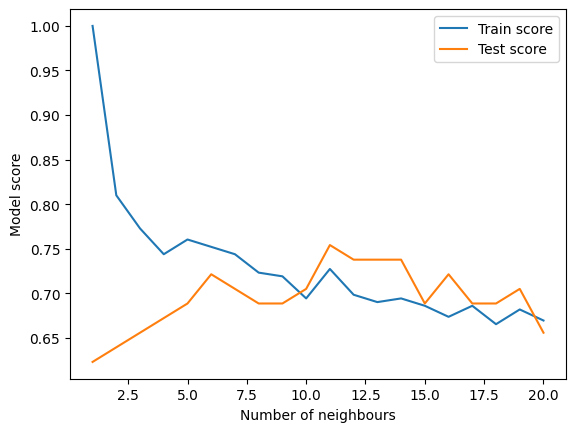

In [36]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xlabel("Number of neighbours")
plt.ylabel("Model score")
plt.legend();

# Hyperparameters tuing with RandomizedSearchCV



In [37]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [38]:
# Create a hyperparameter grid fot logistic regression
log_reg_grid = {"C" : np.logspace(-4,4,20),
               "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid= {"n_estimators" : np.arange(10,1000,50),
         "max_depth" : [None,3,5,10],
         "min_samples_split" : np.arange(2,20,2),
         "min_samples_leaf" : np.arange(1,20,2)}

In [39]:
# Tune LogisticRegression

np.random.seed(42)

#Setup random hyperparameter search for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit random hyperparameters search model for logisticRegression
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
# Tune Randomforest

np.random.seed(42)

#Setup random hyperparameter search for  RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit random hyperparameters search model for RandomForestClassifier
rs_rf.fit(X_train,Y_train)

In [51]:
#Evaluate randomized search RandomForestClassifier model
rs_rf.score(X_test,Y_test)

0.8688524590163934

In [52]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluting our tuned ML classifier,beyond accuracy
*Confusion matrix
*Classification Report
*Precision
*Recall
*F1-score

In [53]:
# Make predictions with tuned model
y_preds = rs_log_reg.predict(X_test)

In [54]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [55]:
Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [56]:
from sklearn.metrics import roc_curve

In [62]:
print(confusion_matrix(Y_test,y_preds))

[[25  4]
 [ 3 29]]


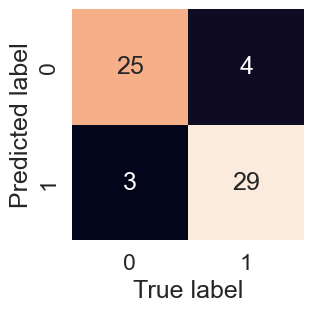

In [66]:
sns.set(font_scale=1.5)

def plot_conf_mat(Y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(Y_test,y_preds),
              annot=True,
                   cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(Y_test,y_preds)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_preds))




              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculate evaluation matrix using cross-validation
we are going to calculate precision,recall and f1-score using cross validation

In [79]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [80]:
#Create a new classifier with best parameters
clf=LogisticRegression(C=0.23357214690901212,
                    solver="liblinear")

In [82]:
#Cross validation accuracy
cv_acc=cross_val_score(clf,
                      X,
                      Y,
                      cv=5,
                      scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [84]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [85]:
#Cross validation precision
cv_pre=cross_val_score(clf,
                      X,
                      Y,
                      cv=5,
                      scoring="precision")
cv_pre=np.mean(cv_pre)
cv_pre

0.8215873015873015

In [86]:
#Cross validation recall

cv_recall=cross_val_score(clf,
                      X,
                      Y,
                      cv=5,
                      scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9272727272727274

In [87]:
#Cross validation f1-score
cv_f1=cross_val_score(clf,
                      X,
                      Y,
                      cv=5,
                      scoring="f1")
cv_f1=np.mean(cv_recall)
cv_f1

0.9272727272727274

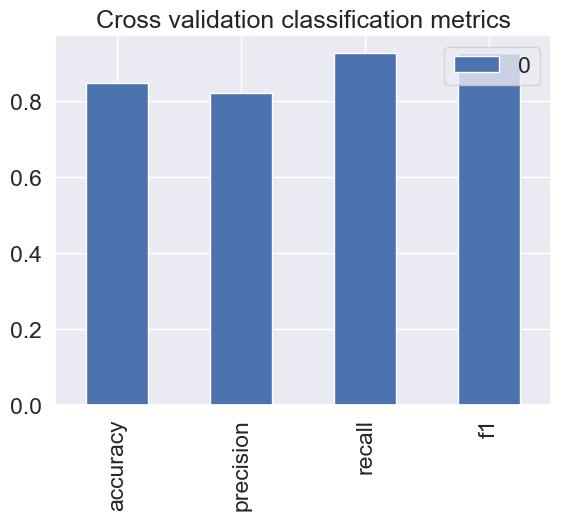

In [90]:
#Visualize cross-validation metrics
cv_metrics = pd.DataFrame({"accuracy" : cv_acc,
                          "precision" : cv_pre,
                          "recall" : cv_recall,
                          "f1" :cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross validation classification metrics");